In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings

In [2]:
# Load dataset
df = pd.read_csv("Dataset.csv")

In [3]:
# Display basic information about the dataset
df.head()
df.info()
print(df.describe())

<class 'pandas.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   str    
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   str    
 4   Address               9551 non-null   str    
 5   Locality              9551 non-null   str    
 6   Locality Verbose      9551 non-null   str    
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   str    
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   str    
 12  Has Table booking     9551 non-null   str    
 13  Has Online delivery   9551 non-null   str    
 14  Is delivering now     9551 non-null   str    
 15  Switch to order menu  9551 non-n

In [4]:
# Check if there are any missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
# Handle the missing values
df['Cuisines'] = df['Cuisines'].fillna('Unknown')

In [6]:
# Drop irrelevant columns
df = df.drop([
    'Restaurant ID',
    'Restaurant Name',
    'Address',
    'Locality Verbose',
    'Rating color',
    'Rating text'
], axis=1)


In [7]:
# Encode binary categorical columns
binary_cols = [
    'Has Table booking',
    'Has Online delivery',
    'Is delivering now',
    'Switch to order menu'
]

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [8]:
# One-hot encode remaining categorical variables
df = pd.get_dummies(
    df,
    columns=['City', 'Locality', 'Cuisines', 'Currency', 'Country Code'],
    drop_first=True
)


In [9]:
# Final missing data check
print("Total missing values:", df.isnull().sum().sum())

Total missing values: 0


In [10]:
# Splitting the target variable

X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
# Model 1: Linear Regression

# Initialize model
lr_model = LinearRegression()

# Train model
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

In [12]:
#Evaluate Linear Regression

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance")
print("MSE:", mse_lr)
print("R2 Score:", r2_lr)


Linear Regression Performance
MSE: 1.551128581147195
R2 Score: 0.31851744017922123


In [13]:
# Model 2: Decision Tree Regressor

# Initialize model
dt_model = DecisionTreeRegressor(
    max_depth=5,
    random_state=42
)

# Train model
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)


In [14]:
# Evaluate Decision Tree Regressor

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Performance")
print("MSE:", mse_dt)
print("R2 Score:", r2_dt)


Decision Tree Performance
MSE: 0.10656559231542423
R2 Score: 0.9531808042720598


In [15]:
# Model 3: Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=7,
    random_state=42
)
# Train model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

In [16]:
# Evaluate Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Performance")
print("MSE:", mse_rf)
print("R2 Score:", r2_rf)


Random Forest Performance
MSE: 0.0975460970879136
R2 Score: 0.9571434858773392


In [17]:
# Compare the Models
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MSE': [mse_lr, mse_dt, mse_rf],
    'R2 Score': [r2_lr, r2_dt, r2_rf]
})

print(results)


               Model       MSE  R2 Score
0  Linear Regression  1.551129  0.318517
1      Decision Tree  0.106566  0.953181
2      Random Forest  0.097546  0.957143


**Three regression models were developed to predict restaurant ratings: Linear Regression, Decision Tree Regressor, and Random Forest Regressor. Linear Regression was used as a baseline model and achieved a test R² score of 0.3185, indicating that linear assumptions were insufficient to capture the complexity of the dataset. The Decision Tree Regressor demonstrated a substantial improvement, achieving a test R² score of 0.9532 by effectively modeling non-linear relationships between features. The Random Forest Regressor provided the best overall performance, achieving a test R² score of 0.9571 with reduced prediction error. The close similarity between training and testing scores for the tree-based models suggests strong generalization capability and minimal overfitting. These findings indicate that ensemble tree-based methods are better suited for predicting restaurant ratings in structured datasets compared to traditional linear approaches.
**

In [ ]:
# select a trained model to evaluate(choose dt_model, lr_model or rf_model)

# model = dt_model
# model = lr_model
model = rf_model

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("Evaluating model:", model.__class__.__name__)
print("Train R2:", r2_score(y_train, train_pred))
print("Test R2 :", r2_score(y_test, test_pred))


Evaluating model: RandomForestRegressor
Train R2: 0.9595770968761606
Test R2 : 0.9571434858773392


In [ ]:
# Extract feature importances for Random Forest model

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
)

# Sort in descending order
feature_importance = feature_importance.sort_values(ascending=False)

# Show top 15 important features
print(feature_importance.head(15))

Votes                                                0.980468
Longitude                                            0.007100
Latitude                                             0.004281
Currency_Indian Rupees(Rs.)                          0.002820
Average Cost for two                                 0.001334
Currency_Brazilian Real(R$)                          0.000305
Currency_Dollar($)                                   0.000259
Price range                                          0.000185
Cuisines_Burger, German, Sandwich                    0.000184
Country Code_30                                      0.000164
Cuisines_American, Fast Food, Salad, Healthy Food    0.000152
Cuisines_North Indian, Chinese                       0.000137
Has Online delivery                                  0.000132
City_Rio de Janeiro                                  0.000093
Cuisines_Pizza, Fast Food                            0.000089
dtype: float64


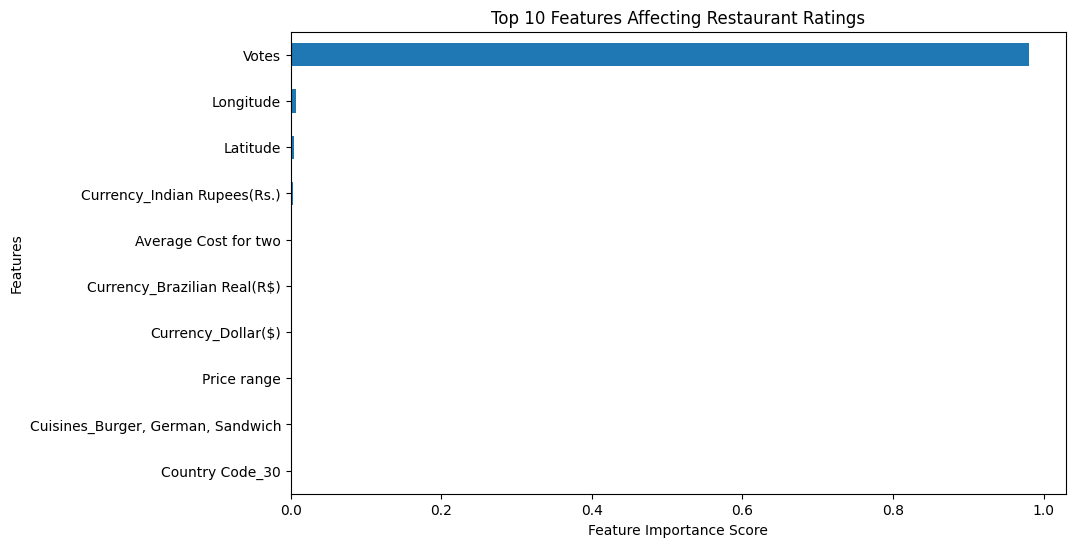

In [23]:
# Visualize the Feature Importance
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='barh')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Features Affecting Restaurant Ratings")
plt.gca().invert_yaxis()
plt.show()

**Feature importance analysis was conducted using the Random Forest Regressor to identify the variables that most strongly influence restaurant rating predictions. The results indicated that the number of votes was by far the most dominant feature, accounting for the majority of the model’s decision-making power. Geographic factors, represented by longitude and latitude, also contributed meaningfully, suggesting that location plays a role in customer perception. Pricing-related attributes, including average cost and currency indicators, provided secondary predictive value, while cuisine and service-related features had comparatively smaller influence.**

In [21]:
X_no_votes = X.drop('Votes', axis=1)

X_train_nv, X_test_nv, y_train_nv, y_test_nv = train_test_split(
    X_no_votes, y, test_size=0.2, random_state=42
)

rf_no_votes = RandomForestRegressor(n_estimators=100,max_depth=7,random_state=42)
rf_no_votes.fit(X_train_nv, y_train_nv)

y_pred_nv = rf_no_votes.predict(X_test_nv)

print("R2 without Votes:", r2_score(y_test_nv, y_pred_nv))


R2 without Votes: 0.40532052147731445


**An ablation study was performed using the Random Forest Regressor by removing the “Votes” feature to evaluate its influence on prediction performance. With all features included, the model achieved a test R² score of approximately 0.96. After excluding the Votes feature, the R² score decreased to about 0.41, demonstrating a substantial reduction in predictive capability. This confirms that customer engagement, represented by the number of votes, is the dominant factor in restaurant rating prediction. Although other attributes—such as pricing, location, cuisine, and service availability—continue to provide meaningful information, they alone are insufficient to achieve high predictive accuracy. This analysis emphasizes the importance of feature contribution assessment in understanding model behavior and reliability.**